In [1]:
using Plots
using Random

In [2]:
# Ages 18 to 55
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

# Developer Salary
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]

38-element Array{Int64,1}:
  17784
  16500
  18012
  20628
  25206
  30252
  34368
  38496
  42000
  46752
  49320
  53200
  56000
      ⋮
  95000
  90000
  91633
  91660
  98150
  98964
 100000
  98988
 100000
 108923
 105000
 103117

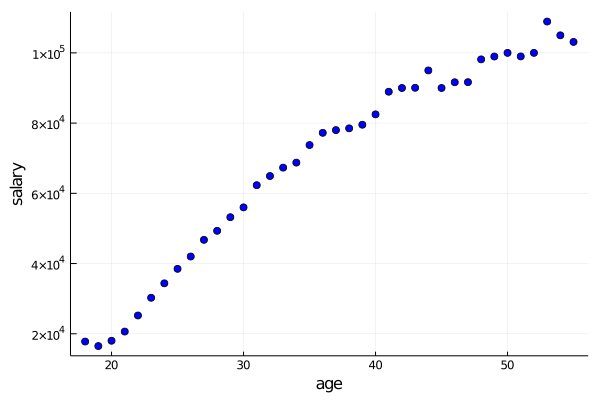

In [4]:
data = [x for x in zip(ages_x, dev_y)]

scatter(dataTuple,
        xaxis = "age",
        yaxis = "salary",
        color = "blue",
        label = false)

In [30]:
#set a random subset of data into train and test
train_x = randsubseq(ages_x, .7)
train_y=[x[2] for x in data if x[1] in train_x ]
train_data=[x for x in zip(train_x,train_y)]
            
test_data = [x for x in data if x ∉ train_data]

15-element Array{Tuple{Int64,Int64},1}:
 (22, 25206)
 (23, 30252)
 (24, 34368)
 (26, 42000)
 (30, 56000)
 (34, 68748)
 (35, 73752)
 (38, 78508)
 (39, 79536)
 (41, 88935)
 (44, 95000)
 (46, 91633)
 (48, 98150)
 (49, 98964)
 (53, 108923)

In [31]:
X=ones(length(train_x),2)
X[:,1]=train_x

ŵ = (X'X)\(X'*train_y)

2-element Array{Float64,1}:
   2456.928549550304
 -21293.101690195825

In [32]:
prediction(x) = ŵ[1] *x + ŵ[2]

prediction (generic function with 1 method)

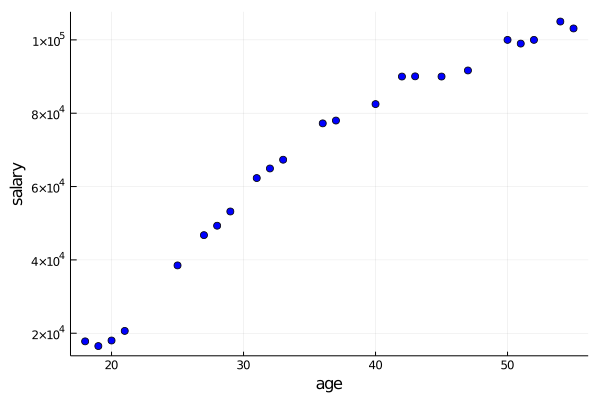

In [33]:
scatter([p for p in train_data],
        xaxis = "age",
        yaxis = "salary",
        color = "blue",
        label = false)


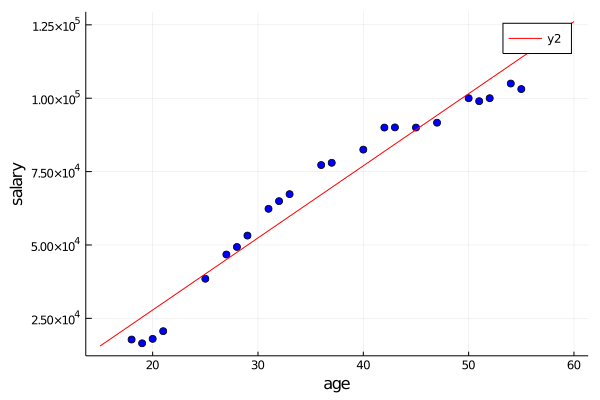

In [34]:
plot!([(x , prediction(x)) for x = 15:60], color = "red")

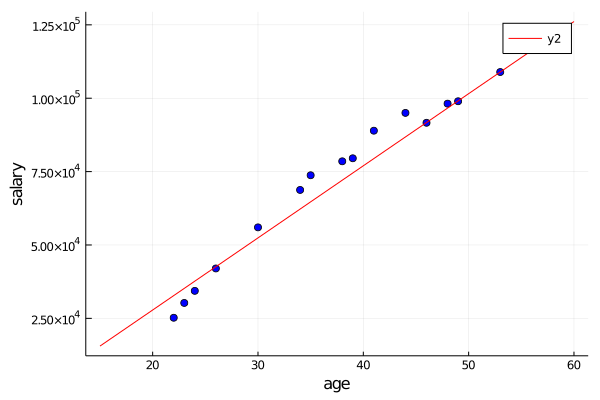

In [35]:
scatter(test_data,
        xaxis = "age",
        yaxis = "salary",
        color = "blue",
        label = false)
plot!([(x , prediction(x)) for x = 15:60], color = "red")

In [36]:
error_array = [abs(prediction(x[1]) - x[2]) for x in train_data]

23-element Array{Float64,1}:
  5147.612201709646
  8888.540751259952
  9833.469300810259
  9674.397850360558
  1634.112048561772
  1708.0308523376152
  1819.1023027873016
  3242.1737532370025
  7444.31665413639
  7599.388104586091
  7531.459555035792
 10075.67390638488
  8386.745356834566
  5503.959708183655
  8102.102609083056
  5701.174059532743
   731.3169604321447
  2522.540138668468
  1553.3257873193797
  5022.254336869693
  6467.182886419992
  6381.039985520591
 10720.96853507089

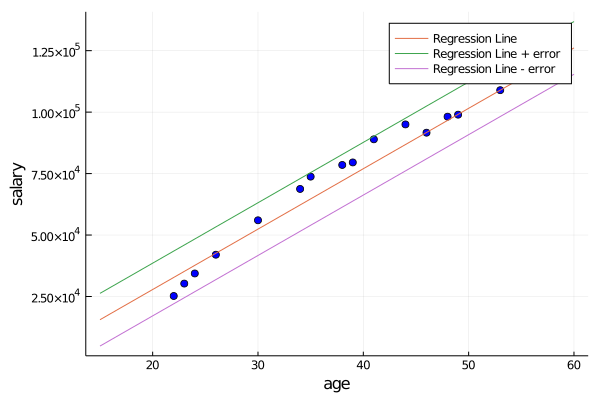

In [37]:
scatter(test_data,
        xaxis = "age",
        yaxis = "salary",
        color = "blue",
        label = false)
plot!([(x , prediction(x)) for x = 15:60],
        label = "Regression Line")
plot!([(x , prediction(x) + maximum(error_array)) for x = 15:60],
        label = "Regression Line + error")
plot!([(x , prediction(x) - maximum(error_array)) for x = 15:60],
        label = "Regression Line - error")

In [38]:
prediction_interval(x) = (prediction(x)- maximum(error_array), prediction(x)+ maximum(error_array))

prediction_interval (generic function with 1 method)

In [39]:
prediction_interval(41)

(68720.00030629575, 90161.93737643753)